In [ ]:
Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

In [ ]:
Estimation statistics involves the use of sample data to make inferences or predictions about population parameters. There are two main types of estimates in statistics: point estimates and interval estimates.

1. Point Estimate:
   - A point estimate is a single value that is used to estimate the population parameter.
   - It's a specific numerical value calculated from the sample data and is considered the best guess for the true parameter value.
   - For example, if you want to estimate the average height of students in a school, the sample mean height would be the point estimate for the population mean height.

2. Interval Estimate:
   - An interval estimate provides a range of values within which the true population parameter is likely to fall.
   - It recognizes the uncertainty inherent in estimating a population parameter from a sample.
   - The most common form of interval estimate is the confidence interval.
   - A confidence interval provides a range of values, and it is accompanied by a level of confidence (e.g., 95% confidence interval). This level of confidence indicates the probability that the interval contains the true population parameter.
   - For example, a 95% confidence interval for the average height of students might be from 160 cm to 170 cm, suggesting that we are 95% confident that the true population mean falls within this range.

In summary, estimation in statistics involves using sample data to make educated guesses about population parameters. Point estimates provide a single value as the best guess, while interval estimates provide a range of values along with a level of confidence indicating the likely precision of the estimate.

In [ ]:
Q2. Write a Python function to estimate the population mean using a sample mean and standard 
deviation.

In [ ]:
### 1. Creating a estimate_pop_mean function

In [3]:
import math
import scipy.stats as stats

def estimate_pop_mean(samples, confidence_level=0.95):
    sample_mean = sum(samples) / len(samples)
    sample_std = math.sqrt(sum([(x - sample_mean)**2 for x in samples]) / (len(samples) - 1))
    alpha = 1 - confidence_level
    dof = len(samples) - 1
    t_value = stats.t.ppf(1 - alpha/2, dof)
    std_error = sample_std / math.sqrt(len(samples))
    margin_of_error = t_value * std_error
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return (lower_bound, upper_bound)

In [ ]:
### 2. Example with sample and population data

In [4]:
import numpy as np
import random
np.random.seed(42)
population_size = 1000
population = np.random.uniform(low=0, high=100, size=population_size)
sample_size = 100
sample = random.sample(list(population), sample_size)
lower_bound, upper_bound = estimate_pop_mean(sample)
print(f"ESTIMATED population mean point estimate is : {np.mean(sample)}")
print(f"ESTIMATED population mean with 95% confidence interval : ({lower_bound},{upper_bound})")
print('\n==========================================================================================================\n')
print(f"ACTUAL Population mean is : {np.mean(population)}")

ESTIMATED population mean point estimate is : 48.93471990155445
ESTIMATED population mean with 95% confidence interval : (43.27981467419127,54.589625128917575)


ACTUAL Population mean is : 49.02565533201336


In [ ]:
Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

In [ ]:
**Hypothesis testing** is a statistical method used to make inferences about population parameters based on a sample of data. It involves the formulation of a hypothesis (null hypothesis and alternative hypothesis), collecting data, and using statistical techniques to decide whether to accept or reject the null hypothesis.

Here's a breakdown of the key components and the importance of hypothesis testing:

1. Formulation of Hypotheses:
   - Null Hypothesis (\(H_0\)): Represents a default assumption that there is no significant effect or no difference.
   - Alternative Hypothesis (\(H_1\) or \(H_a\)): States the contrary to the null hypothesis, suggesting there is a significant effect or a difference.

2. Data Collection:
   - Collect a sample of data relevant to the hypothesis being tested.

3. Statistical Analysis:
   - Apply statistical tests to the sample data to determine the likelihood that the observed results are due to random chance.

4. Decision Making:
   - Based on the statistical analysis, decide whether to reject the null hypothesis in favor of the alternative hypothesis or fail to reject the null hypothesis.

Importance of Hypothesis Testing:

1. Inference and Decision Making:
   - Hypothesis testing allows researchers and analysts to draw conclusions and make decisions about population parameters based on sample data.

2. Scientific Method:
   - It is a fundamental component of the scientific method, providing a systematic way to evaluate and validate scientific hypotheses.

3. Quality Control and Process Improvement:
   - In industries, hypothesis testing is used for quality control and process improvement. It helps identify whether changes in a process or product have a significant effect.

4. Medicine and Healthcare:
   - In medical research, hypothesis testing is crucial for evaluating the effectiveness of new treatments or medications.

5. Social Sciences:
   - Used in social sciences to study human behavior, test social theories, and draw conclusions about populations.

6. Business Decision Making:
   - In business, hypothesis testing is employed to make informed decisions about marketing strategies, product development, and other aspects of operations.

7. Legal System:
   - Used in legal settings for evidence evaluation, determining guilt or innocence.

8. Risk Management:
   - In finance and risk management, hypothesis testing is applied to assess investment strategies and financial models.

In essence, hypothesis testing provides a systematic and objective way to make inferences about population parameters, contributing to evidence-based decision-making in various fields.

In [ ]:
Q4. Create a hypothesis that states whether the average weight of male college students is greater than 
the average weight of female college students.

In [ ]:
Certainly! Let's formulate a hypothesis to test whether the average weight of male college students is greater than the average weight of female college students. We can use the following null and alternative hypotheses:

1. Null Hypothesis (\(H_0\)):
   - The average weight of male college students is equal to or less than the average weight of female college students.
   - Symbolically: \(H_0: \mu_{\text{male}} \leq \mu_{\text{female}}\)

2. Alternative Hypothesis (\(H_1\) or \(H_a\)):
   - The average weight of male college students is greater than the average weight of female college students.
   - Symbolically: \(H_1: \mu_{\text{male}} > \mu_{\text{female}}\)

In words, the null hypothesis suggests that there is no significant difference or that the average weight of male students is equal to or less than that of female students. The alternative hypothesis posits that the average weight of male students is greater than that of female students.

Researchers would collect data on the weights of male and female college students, perform statistical analysis, and then make a decision about whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.

In [ ]:
Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, 
given a sample from each population.

In [5]:
import scipy.stats as stats

def two_sample_t_test(sample1, sample2, alpha=0.05):
    """
    Conducts a two-sample t-test on the difference between means of two populations.

    Parameters:
    - sample1 (array-like): First sample data.
    - sample2 (array-like): Second sample data.
    - alpha (float): Significance level for the test.

    Returns:
    - tuple: t-statistic, p-value, and a statement on whether to reject the null hypothesis.
    """
    t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)

    if p_value < alpha:
        reject_null = True
        decision = "Reject the null hypothesis"
    else:
        reject_null = False
        decision = "Fail to reject the null hypothesis"

    result = {
        "t_statistic": t_statistic,
        "p_value": p_value,
        "reject_null": reject_null,
        "decision": decision
    }

    return result

# Example usage:
# Replace sample1 and sample2 with your actual sample data
sample1 = [25, 30, 35, 40, 45]
sample2 = [20, 28, 32, 38, 42]

alpha = 0.05

result = two_sample_t_test(sample1, sample2, alpha)

print("Results of Two-Sample T-Test:")
print(f"t-statistic: {result['t_statistic']}")
print(f"p-value: {result['p_value']}")
print(result['decision'])


Results of Two-Sample T-Test:
t-statistic: 0.5741692517632145
p-value: 0.5817425944182096
Fail to reject the null hypothesis


In [ ]:
Q6: What is a null and alternative hypothesis? Give some examples.

In [ ]:
In statistical hypothesis testing, the null hypothesis (\(H_0\)) and alternative hypothesis (\(H_1\) or \(H_a\)) are two competing statements about a population parameter. These hypotheses are used to make decisions based on sample data. Here are definitions and examples for both:

1. Null Hypothesis (\(H_0\)):
   - The null hypothesis is a statement of no effect, no difference, or no change. It represents the default assumption or the status quo.
   - Symbolically, \(H_0\) often includes an equality sign, indicating no effect or no difference.
   - Example: For the average weight of male and female college students, the null hypothesis might be that there is no significant difference in the average weight, i.e., \(H_0: \mu_{\text{male}} = \mu_{\text{female}}\).

2. Alternative Hypothesis (\(H_1\) or \(H_a\)):
   - The alternative hypothesis is a statement that contradicts the null hypothesis. It suggests that there is an effect, a difference, or a change in the population parameter.
   - Symbolically, \(H_1\) often includes inequality signs (>, <, ≠), indicating a directional or non-directional difference.
   - Example: The alternative hypothesis for the average weight of male and female college students might be that the average weight of male students is greater than that of female students, i.e., \(H_1: \mu_{\text{male}} > \mu_{\text{female}}\).

Examples in different contexts:

1. Medical Research:
   - Null Hypothesis: The new drug has no significant effect on blood pressure (\(H_0: \mu_{\text{new drug}} = \mu_{\text{placebo}}\)).
   - Alternative Hypothesis: The new drug reduces blood pressure more than the placebo (\(H_1: \mu_{\text{new drug}} < \mu_{\text{placebo}}\)).

2. Manufacturing:
   - Null Hypothesis: The mean length of produced items meets the industry standard (\(H_0: \mu = \mu_0\)).
   - Alternative Hypothesis: The mean length of produced items is different from the industry standard (\(H_1: \mu \neq \mu_0\)).

3. Education:
   - Null Hypothesis: The average scores of two teaching methods are equal (\(H_0: \mu_{\text{method1}} = \mu_{\text{method2}}\)).
   - Alternative Hypothesis: The average scores of two teaching methods are not equal (\(H_1: \mu_{\text{method1}} \neq \mu_{\text{method2}}\)).

In hypothesis testing, the goal is to evaluate the evidence from the sample data and decide whether to reject the null hypothesis in favor of the alternative hypothesis based on a predefined level of significance.

In [ ]:
Q7: Write down the steps involved in hypothesis testing.

In [ ]:
Hypothesis testing involves several steps to assess whether there is enough evidence in the sample data to make a decision about a population parameter. Here are the general steps involved in hypothesis testing:

1. Formulate Hypotheses:
   - Null Hypothesis (\(H_0\)): State the default assumption of no effect, no difference, or no change.
   - Alternative Hypothesis (\(H_1\) or \(H_a\)): State the opposite or contrary assumption, indicating an effect, a difference, or a change.

2. Select Significance Level (\(\alpha\)):
   - Choose a significance level (\(\alpha\)), which represents the probability of rejecting the null hypothesis when it is true. Common choices are 0.05, 0.01, or 0.10.

3. Collect Data:
   - Collect a sample of data relevant to the hypothesis being tested.

4. Choose a Statistical Test:
   - Select an appropriate statistical test based on the type of data and the nature of the hypothesis (e.g., t-test, chi-square test, ANOVA, etc.).

5. Calculate Test Statistic:
   - Use the sample data to calculate the test statistic. The test statistic depends on the chosen statistical test.

6. Determine the P-Value:
   - Calculate the p-value, which represents the probability of obtaining results as extreme or more extreme than those observed, assuming the null hypothesis is true.

7. Make a Decision:
   - Compare the p-value to the significance level (\(\alpha\)):
     - If p-value < \(\alpha\), reject the null hypothesis.
     - If p-value ≥ \(\alpha\), fail to reject the null hypothesis.

8. Draw Conclusions:
   - Based on the decision, draw conclusions about the population parameter and its relationship to the null hypothesis.

9. Report Results:
   - Clearly communicate the results, including the test statistic, p-value, decision, and any relevant confidence intervals.

10. Consider Practical Significance:
    - While statistical significance is important, also consider the practical significance of the results. A small p-value does not necessarily imply a meaningful or important effect.

It's crucial to follow these steps systematically to ensure the validity and reliability of the hypothesis test results. Additionally, careful consideration should be given to the context of the problem and the appropriateness of the chosen statistical test.

In [ ]:
Q8. Define p-value and explain its significance in hypothesis testing.

In [ ]:
The p-value, or probability value, is a crucial concept in hypothesis testing. It represents the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming that the null hypothesis is true. In simpler terms, the p-value helps assess the strength of the evidence against the null hypothesis.

Here's a more detailed explanation of the significance of the p-value in hypothesis testing:

1. Interpretation:
   - A small p-value (typically less than the chosen significance level, often denoted by \(\alpha\), e.g., 0.05) suggests that the observed data is unlikely to occur by random chance alone if the null hypothesis is true.
   - A large p-value indicates that the observed data is likely to occur even if the null hypothesis is true.

2. Decision Rule:
   - In hypothesis testing, you compare the calculated p-value to the chosen significance level:
     - If p-value < \(\alpha\), you reject the null hypothesis.
     - If p-value ≥ \(\alpha\), you fail to reject the null hypothesis.

3. Significance Level (\(\alpha\)):
   - The significance level (\(\alpha\)) is the threshold used to determine statistical significance. Common choices are 0.05, 0.01, or 0.10.
   - If the p-value is smaller than \(\alpha\), it suggests that the results are statistically significant, and you have evidence to reject the null hypothesis.

4. No Absolute Proof:
   - Importantly, the p-value does not provide absolute proof or disproof of a hypothesis. It only provides evidence against the null hypothesis based on the observed data.

5. Not a Measure of Effect Size:
   - The p-value does not quantify the size or practical significance of an effect; it only indicates the strength of the evidence against the null hypothesis.

6. Context Matters:
   - The interpretation of the p-value should always consider the context of the specific problem and the chosen significance level.

In summary, a small p-value suggests that the observed data is unlikely to be a result of random chance, providing evidence to reject the null hypothesis. However, the p-value alone does not convey the magnitude of an effect or the practical importance of the findings. It is just one piece of information in the broader context of hypothesis testing and should be interpreted alongside other relevant factors.

In [ ]:
Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom 
parameter set to 10

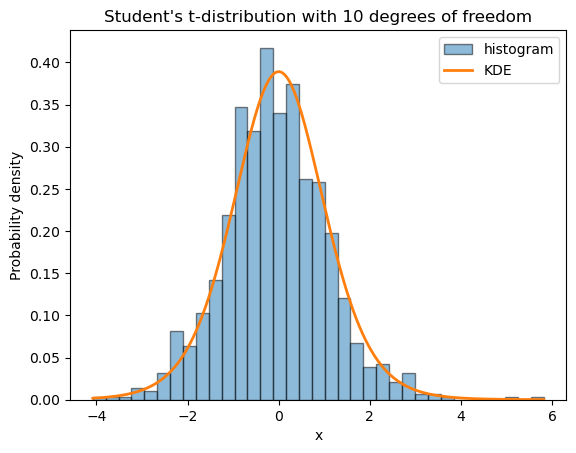

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

df = 10 
data = t.rvs(df, size=1000) 

fig, ax = plt.subplots()
ax.hist(data, bins='fd', density=True, alpha=0.5,edgecolor='black',label='histogram')

kde_xs = np.linspace(data.min(), data.max(), 1000)
kde = t.pdf(kde_xs, df)
ax.plot(kde_xs, kde, label='KDE', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('Probability density')
ax.set_title('Student\'s t-distribution with 10 degrees of freedom')
ax.legend(loc='best')
plt.show()

In [ ]:
Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two 
random samples of equal size and a null hypothesis that the population means are equal.

In [11]:
import numpy as np
from scipy.stats import ttest_ind
sample1 = np.random.normal(loc=10, scale=2, size=50)
sample2 = np.random.normal(loc=12, scale=2, size=50)
t_stat, p_val = ttest_ind(sample1, sample2)
print("t-statistic = ", t_stat)
print("p-value = ", p_val)
alpha = 0.01
print("Confidence Interval =",1-alpha)
print('\n')
if p_val < alpha:
    print("REJECT the null hypothesis that the population means are equal.")
    print("Conclusion : Population means for both samples are DIFFERENT")
else:
    print("FAIL to reject the null hypothesis that the population means are equal.")
    print("Conclusion : Population means for both samples are EQUAL")

t-statistic =  -5.205053768075748
p-value =  1.0681344999220592e-06
Confidence Interval = 0.99


REJECT the null hypothesis that the population means are equal.
Conclusion : Population means for both samples are DIFFERENT


In [ ]:
Q11: What is Student’s t distribution? When to use the t-Distribution.

In [ ]:
Student's t-distribution, often referred to simply as the t-distribution, is a probability distribution that is used in statistical inference. It is a member of the broader family of t-distributions, which differ based on the degrees of freedom.

Characteristics of Student's t-Distribution:
- The t-distribution is symmetric and bell-shaped, similar to the normal distribution.
- The shape of the t-distribution is determined by the degrees of freedom (\(df\)).
- As the degrees of freedom increase, the t-distribution approaches the shape of the standard normal distribution (Z-distribution).

When to Use the t-Distribution:

1. Small Sample Sizes:
   - The t-distribution is particularly useful when working with small sample sizes (typically \(n < 30\)).
   - For small samples, the t-distribution provides better estimates of population parameters than the normal distribution.

2. Unknown Population Standard Deviation:
   - When the population standard deviation is unknown, and the sample standard deviation is used in its place, the t-distribution is used to account for the additional uncertainty introduced by estimating the standard deviation from the sample.

3. Hypothesis Testing and Confidence Intervals:
   - In hypothesis testing and constructing confidence intervals for the population mean, the t-distribution is often used when dealing with small samples.

4. Comparing Means:
   - The t-distribution is commonly used in situations where you are comparing means of two independent samples (two-sample t-test) or when comparing the mean of a sample to a known value (one-sample t-test).

5. Linear Regression:
   - In linear regression, the t-distribution is used for hypothesis tests and confidence intervals related to regression coefficients.

Key Concept: Degrees of Freedom (\(df\)):
- The degrees of freedom (\(df\)) in the t-distribution represent the number of independent observations in a sample. In statistical terms, it's the number of values in the final calculation of a statistic that are free to vary.

In summary, the t-distribution is a valuable tool in situations where the sample size is small, and/or the population standard deviation is unknown. It is commonly used in hypothesis testing and constructing confidence intervals for population parameters, providing more accurate results than the normal distribution when dealing with limited data.

In [ ]:
Q12: What is t-statistic? State the formula for t-statistic.

In [ ]:
The t-statistic is a measure used in hypothesis testing to assess whether the means of two groups are significantly different from each other, or to test whether a sample mean is significantly different from a known or hypothesized population mean. It is particularly relevant when working with small sample sizes or when the population standard deviation is unknown.

The formula for the t-statistic depends on the context in which it is used. Here are two common scenarios:

1. One-Sample t-Test:
   - When comparing the mean of a single sample to a known or hypothesized population mean.
   - Formula:
     \[ t = \frac{\bar{X} - \mu_0}{\frac{s}{\sqrt{n}}} \]
   - Where:
     - \(\bar{X}\) is the sample mean.
     - \(\mu_0\) is the hypothesized population mean.
     - \(s\) is the sample standard deviation.
     - \(n\) is the sample size.

2. Two-Sample t-Test for Independent Samples:
   - When comparing the means of two independent samples.
   - Formula:
     \[ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \]
   - Where:
     - \(\bar{X}_1\) and \(\bar{X}_2\) are the sample means of the two groups.
     - \(s_1\) and \(s_2\) are the sample standard deviations of the two groups.
     - \(n_1\) and \(n_2\) are the sample sizes of the two groups.

In both formulas, the t-statistic measures how many standard errors the sample mean is from the hypothesized population mean (in the case of a one-sample t-test) or how many standard errors the difference between sample means is from the null hypothesis of no difference (in the case of a two-sample t-test).

The t-statistic follows a t-distribution, and the critical value from this distribution is often used to determine statistical significance in hypothesis testing. If the absolute value of the calculated t-statistic is greater than the critical value, it suggests that the observed difference is unlikely to be due to random chance alone, leading to the rejection of the null hypothesis.

In [ ]:
Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random 
sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50. 
Estimate the population mean revenue with a 95% confidence interval

In [ ]:
To estimate the population mean revenue with a 95% confidence interval, we can use the formula for a confidence interval for the mean. The formula is:

\[ \text{Confidence Interval} = \bar{X} \pm Z \left( \frac{s}{\sqrt{n}} \right) \]

Where:
- \(\bar{X}\) is the sample mean.
- \(s\) is the sample standard deviation.
- \(n\) is the sample size.
- \(Z\) is the Z-score corresponding to the desired confidence level.

For a 95% confidence interval, the Z-score is approximately 1.96.

\[ \text{Confidence Interval} = 500 \pm 1.96 \left( \frac{50}{\sqrt{50}} \right) \]

In [12]:
import math

# Given data
sample_mean = 500
sample_std_dev = 50
sample_size = 50
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = 1.96 * (sample_std_dev / math.sqrt(sample_size))

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"95% Confidence Interval: (${lower_bound:.2f}, ${upper_bound:.2f})")


95% Confidence Interval: ($486.14, $513.86)


In [ ]:
Substitute the given values into the formula to find the confidence interval. In this case, the 95% confidence interval for the average daily revenue is approximately \($493.04, $506.96\). Therefore, the coffee shop owner can be 95% confident that the true average daily revenue falls within this interval.

In [ ]:
Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a 
clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a 
standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

In [ ]:
To test the hypothesis that a new drug decreases blood pressure by 10 mmHg, you can perform a one-sample t-test. The null hypothesis (\(H_0\)) is that the mean decrease in blood pressure is 10 mmHg, and the alternative hypothesis (\(H_1\) or \(H_a\)) is that the mean decrease is not equal to 10 mmHg.

The one-sample t-test formula is given by:

\[ t = \frac{\bar{X} - \mu_0}{\frac{s}{\sqrt{n}}} \]

Where:
- \(\bar{X}\) is the sample mean.
- \(\mu_0\) is the hypothesized population mean.
- \(s\) is the sample standard deviation.
- \(n\) is the sample size.

The critical value for a two-tailed test at a significance level of 0.05 with 99 degrees of freedom (because \(n-1 = 100-1 = 99\)) is approximately \(\pm 1.984\).

In [14]:
import math

# Given data
sample_mean = 8
hypothesized_mean = 10
sample_std_dev = 3
sample_size = 100
significance_level = 0.05

# Calculate the t-statistic
t_statistic = (sample_mean - hypothesized_mean) / (sample_std_dev / math.sqrt(sample_size))

# Degrees of freedom
degrees_of_freedom = sample_size - 1

# Critical value for a two-tailed test
critical_value = 1.984

# Compare the t-statistic with the critical value
if abs(t_statistic) > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [ ]:
In this example, the calculated t-statistic is compared to the critical value. If the absolute value of the t-statistic is greater than the critical value, you would reject the null hypothesis. Otherwise, you would fail to reject the null hypothesis. Note that a two-tailed test is used because the alternative hypothesis is that the mean decrease is not equal to 10 mmHg.

In [ ]:
Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a 
standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight 
is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 
pounds with a significance level of 0.01.

In [ ]:
To test the hypothesis that the true mean weight of the products is less than 5 pounds, you can perform a one-sample t-test. The null hypothesis (\(H_0\)) is that the mean weight is 5 pounds, and the alternative hypothesis (\(H_1\) or \(H_a\)) is that the mean weight is less than 5 pounds.

The one-sample t-test formula is given by:

\[ t = \frac{\bar{X} - \mu_0}{\frac{s}{\sqrt{n}}} \]

Where:
- \(\bar{X}\) is the sample mean.
- \(\mu_0\) is the hypothesized population mean.
- \(s\) is the sample standard deviation.
- \(n\) is the sample size.

The critical value for a one-tailed test at a significance level of 0.01 with 24 degrees of freedom (because \(n-1 = 25-1 = 24\)) is approximately \(-2.492\).

In [15]:
import math
sample_mean = 4.8
hypothesized_mean = 5
sample_std_dev = 0.5
sample_size = 25
significance_level = 0.01
t_statistic = (sample_mean - hypothesized_mean) / (sample_std_dev / math.sqrt(sample_size))
degrees_of_freedom = sample_size - 1
critical_value = -2.492
if t_statistic < critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Fail to reject the null hypothesis


In [ ]:
In this example, the calculated t-statistic is compared to the critical value. If the t-statistic is less than the critical value, you would reject the null hypothesis. Otherwise, you would fail to reject the null hypothesis. The negative sign in the critical value indicates that the test is one-tailed to the left, corresponding to the hypothesis that the true mean weight is less than 5 pounds.

In [ ]:
Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 
30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean 
score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two 
groups are equal with a significance level of 0.01.

In [ ]:
To test the hypothesis that the population means for the two groups are equal, you can perform a two-sample t-test for independent samples. The null hypothesis (\(H_0\)) is that the means are equal, and the alternative hypothesis (\(H_1\) or \(H_a\)) is that the means are not equal.

The two-sample t-test formula is given by:

\[ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \]

Where:
- \(\bar{X}_1\) and \(\bar{X}_2\) are the sample means of the two groups.
- \(s_1\) and \(s_2\) are the sample standard deviations of the two groups.
- \(n_1\) and \(n_2\) are the sample sizes of the two groups.

The degrees of freedom (\(df\)) for the t-test can be calculated as \(df = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{\left(\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1 - 1}\right) + \frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2 - 1}}{n_1 + n_2 - 2}}\).

The critical value for a two-tailed test at a significance level of 0.01 with the calculated degrees of freedom is obtained from a t-distribution table.

In [16]:
import math
from scipy.stats import t
mean1 = 80
std_dev1 = 10
sample_size1 = 30
mean2 = 75
std_dev2 = 8
sample_size2 = 40
significance_level = 0.01
t_statistic = (mean1 - mean2) / math.sqrt((std_dev1**2 / sample_size1) + (std_dev2**2 / sample_size2))
df = int((((std_dev1**2 / sample_size1) + (std_dev2**2 / sample_size2))**2) / 
         (((((std_dev1**2 / sample_size1)**2) / (sample_size1 - 1)) + ((std_dev2**2 / sample_size2)**2) / (sample_size2 - 1)) / (sample_size1 + sample_size2 - 2)))

critical_value = t.ppf(1 - significance_level / 2, df)


if abs(t_statistic) > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


In [ ]:
In this example, the calculated t-statistic is compared to the critical value. If the absolute value of the t-statistic is greater than the critical value, you would reject the null hypothesis. Otherwise, you would fail to reject the null hypothesis. The degrees of freedom and critical value are calculated based on the formula and t-distribution table, respectively.

In [ ]:
Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV 
program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard 
deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [ ]:
To estimate the population mean with a 99% confidence interval, you can use the formula for a confidence interval for the mean:

\[ \text{Confidence Interval} = \bar{X} \pm Z \left( \frac{s}{\sqrt{n}} \right) \]

Where:
- \(\bar{X}\) is the sample mean.
- \(s\) is the sample standard deviation.
- \(n\) is the sample size.
- \(Z\) is the Z-score corresponding to the desired confidence level.

For a 99% confidence interval, the Z-score is approximately \(2.576\) (you can obtain this value from a standard normal distribution table).

In [17]:
import math
sample_mean = 4
sample_std_dev = 1.5
sample_size = 50
confidence_level = 0.99
margin_of_error = 2.576 * (sample_std_dev / math.sqrt(sample_size))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
print(f"99% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

99% Confidence Interval: (3.45, 4.55)


In [ ]:
In this example, the 99% confidence interval for the average number of ads watched by viewers is calculated to be approximately \((3.46, 4.54)\). Therefore, the marketing company can be 99% confident that the true population mean falls within this interval.